<a href="https://colab.research.google.com/github/oscarserc/TESIS/blob/main/PASO_3c___CNN_3D____grid20x20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UTILIZACIÓN DE TÉCNICAS DE APRENDIZAJE AUTOMÁTICO PARA LA DETECCIÓN DE LOS NODOS INFLUYENTES.

La base de datos que emplearemos será de unas 70.000 observaciones. En concreto:

· 72.000 observaciones

· Para ello generamos una 1800 **simulaciones**, y guardamos unos 40 **frames** de cada una de ellas

· Además como **target** guardamos la matriz con la IDENTIDAD de todos y cada uno de los AGENTES.



#**PRUEBA 3**: Utilizaremos una <font color='green'>**RED NEURONAL CONVOLUCIONAL 3D**</font>, ya que nos permite preservar el orden de los frames en cada SIMULACIÓN.

#Planteamos nuevamente el problema de localizar a los agentes influyentes como un problema de **Segmentación** de imágenes. (Cada pixel corresponde a un agente y ha de ser clasificado en uno de los tipos que se han definico)

La estructura que hemos probado de partida es la que aparece a continuación (*Prueba final al final del archivo (v2): con una profundidad del kernel igual al número de frames consecutivos que se prentenden procesar*).


<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/CNN_3D__3___pruebas_a4__Sementacion2clases.png?raw=true' width="1050"/>
<figcaption>fig. 1: En esta primera prueba manejamos sólo dos tipos de agentes: <b>Agente EMOCIONAL</b> y <b>Agente MUTANTE TRAIDOR</b>. Por ello el problema se trata de uno de CLASIFICACIÓN BINARIA. Cada pixel ha de ser marcado como perteneciente a una población u otra. La salida de la red son dos matrices de 10x10 (dos por cada frame de la animación) con la probabilidad de pertenencia a cada clase.</figcaption></center>
</figure>


El archivo de prueba contiene 4000 simulaciones de una población de AGENTES EMOCIONALES, y otras 4000 de agentes TRAIDORES (de la observación 4001 a la 8000).


<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Archivo_E_CNN.png?raw=true' width="1000"/>
<figcaption></figcaption></center>
</figure>





Podemos comenzar **aleatorizando**, y después manteniendo agrupadas las observaciones (frames) que forman parte de la misma Simulación (animación).

#CARGA DE LA BASE DE DATOS (mezcla agentes **emocionales** y mutantes **traidores**).

Como hemos de empaquetar los frames asociados a cada simulación (inicialmente en la base de prueba: 200 simulaciones x 40 frames = 8000 observaciones en el data frame), la aleatorización habremos de hacerla al final. De esta manera conservamos la relación temporal entre frames.

**POBLACIÓN 1**. Podemos elegir entre la base de datos de 4000 observaciones de agentes emocionales, más otras 4000 de agentes traidores infiltrados en una población de agentes emocionales.

In [ ]:

import pandas as pd

# CARGAMOS LA BASE DE DATOS SIN PERMUTAR LAS FILAS
# ------------------------------------------------
bd_simulaciones = pd.read_csv('bd_combinado.csv')


**POBLACIÓN 2**. Base de datos con 100 simulaciones de un grid de 20x20. La población mutante es del 15%.

In [ ]:


import pandas as pd

# CARGAMOS LA BASE DE DATOS SIN PERMUTAR LAS FILAS (grid de 20x20, y población 85-15 emocionales/mutantes)
# ------------------------------------------------
bd_simulaciones = pd.read_csv('bd_100simulaciones_20x20_emo85_vs_15.csv')



In [ ]:

pd.options.display.float_format = '{:,.2f}'.format
bd_simulaciones


,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b393,b394,b395,b396,b397,b398,b399,Simulacion_ID,Frame,Target
0,0.00,0.00,0.00,0.20,0.40,0.20,0.40,0.00,0.20,0.00,...,0.20,1.00,0.40,0.20,0.20,0.00,0.00,1,1,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,0.00,0.00,0.00,0.20,0.40,0.20,0.40,0.00,0.20,0.00,...,0.20,1.00,0.40,0.20,0.20,0.00,0.00,1,2,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,0.00,0.00,0.00,0.20,0.40,0.20,0.40,0.00,0.20,0.00,...,0.20,1.00,0.40,0.20,0.20,0.00,0.00,1,3,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,0.00,0.00,0.00,0.20,0.40,0.20,0.40,0.00,0.20,0.00,...,0.20,1.00,0.40,0.20,0.20,0.00,0.00,1,4,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,0.00,0.00,0.00,0.20,0.40,0.20,0.40,0.00,0.20,0.00,...,0.20,1.00,0.40,0.20,0.20,0.00,0.00,1,5,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.33,0.20,0.00,0.00,0.20,0.20,0.20,0.20,0.00,0.00,...,0.00,0.00,0.00,0.20,0.20,0.20,0.00,100,36,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3996,0.33,0.20,0.20,0.00,0.00,0.20,0.20,0.20,0.00,0.00,...,0.00,0.00,0.00,0.20,0.20,0.20,0.00,100,37,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3997,0.33,0.20,0.00,0.00,0.20,0.20,0.20,0.20,0.00,0.00,...,0.00,0.00,0.00,0.20,0.20,0.20,0.00,100,38,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3998,0.33,0.20,0.20,0.00,0.00,0.20,0.20,0.20,0.00,0.00,...,0.00,0.00,0.00,0.20,0.20,0.20,0.00,100,39,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#Variables explicativas: **X**

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

size       = 20  # <------------------------------------------------------------------- LA POBLACIÓN 2 ES DE UN GRID DE 20x20
num_frames = 40
df         = bd_simulaciones.copy()

lista_RGBs         = []
lista_simulaciones = []

X            = []

nombre_columnas_ROJO  = ['r' + str(indice) for indice in range(size*size)]
nombre_columnas_VERDE = ['g' + str(indice) for indice in range(size*size)]
nombre_columnas_AZUL  = ['b' + str(indice) for indice in range(size*size)]

# Iteramos por las 8000 filas de la base de datos de prueba
for fila in range(len(bd_simulaciones)):
  canal_r = pd.array(df[nombre_columnas_ROJO].iloc[fila]).reshape(size,size)
  canal_v = pd.array(df[nombre_columnas_VERDE].iloc[fila]).reshape(size,size)
  canal_a = pd.array(df[nombre_columnas_AZUL].iloc[fila]).reshape(size,size)

  # CUIDADO que np.dstack apila los tres valores de cada pixel
  # ----------------------------------------------------------
  frame = np.array([canal_r, canal_v, canal_a])

  lista_RGBs.append(frame)

  if ((fila+1) % num_frames == 0):
    lista_simulaciones.append(np.array(lista_RGBs))
    lista_RGBs = []


X = np.array(lista_simulaciones)
X.shape


(100, 40, 3, 20, 20)

#Target: **Y**.

In [ ]:

lista_targets            = []
lista_targets_simulacion = []

for fila in range(len(bd_simulaciones)):
  lista_id_agentes = bd_simulaciones.iloc[fila]['Target'].replace('[','').replace(']','')
  target = [int(caracter) for caracter in lista_id_agentes.split(',')]
  target = np.array(target)
  target = target.reshape(size,size)

  # Con los paréntesis  '['  ']' sale de dimensión: (8000, 1, 10, 10)   # <-------------------------- Aquí ajusto la DIMENSIÓN
  #lista_targets.append([target])
  # Si queremos de dimensión: (8000, 10, 10)
  lista_targets_simulacion.append(target)

  if ((fila+1) % num_frames == 0):
    lista_targets.append(np.array(lista_targets_simulacion))
    lista_targets_simulacion = []

Y = np.array(lista_targets)
Y.shape


(100, 40, 20, 20)

#**CONVERSIÓN EN TENSORES DE PyTorch**.

In [ ]:

import numpy as np
import torch

# PRIMERO TENEMOS QUE EXTRAER LA MATRIX:  X
# y los valores del TARGET:               Y
#
# Luego pasaremos (X, Y) al Dataset que creamos a continuación.
# --------------------------------------------------------------

X_train = X
Y_train = Y

# CREAMOS UNA CLASE PARA LOS DATOS
# ================================

class Dataset_frames(torch.utils.data.Dataset):
  def __init__(self, X, Y):
    # self.X = torch.tensor(X).float()
    self.X = torch.tensor(X).permute(0,2,1,3,4).float()
    self.Y = torch.tensor(Y).long()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return self.X[ix], self.Y[ix]


# SELECCIONANDO GRUPOS DE OBSERVACIONES PARA VALIDACIÓN
# -----------------------------------------------------

from sklearn.model_selection import train_test_split

X_subset, X_val, Y_subset, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)

dataset = {
    'train' : Dataset_frames(X_subset, Y_subset),
    'val'   : Dataset_frames(X_val, Y_val)
}

# Al bajar el batch_size mejora mucho el entrenamiento. Debe ser que si pongo muchos, queda muy poca muestra
# Con 30 sale muy malo. Con 10 mejora mucho

dataloader = {
    'train' : torch.utils.data.DataLoader(dataset['train'], batch_size=10,   shuffle=False),
    'val'   : torch.utils.data.DataLoader(dataset['val'],   batch_size=10, shuffle=False)
}


In [ ]:

frames, mascara = next(iter(dataloader['train']))
frames.shape, mascara.shape


(torch.Size([30, 3, 40, 10, 10]), torch.Size([30, 40, 10, 10]))

#**DEFINICIÓN DE LA RED Y MÉTODO PARA EL ENTRENAMIENTO**.

In [ ]:

from sklearn.metrics import accuracy_score

# Fijamos el número de canales, filtros y profundidad de la imagen (número de frames de la animación)
# ----------------------------------------------------------------
n_in        = 3 # 40
n_filtros   = 40
kernel_size = 3
deepth      = 40  # Tomamos 40 frames de animación (parece que itera automáticamente por los índices profundidad y altura y anchura)

# CONSTRUIMOS EL MODELO
# =====================

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

# ---------------------------------------------------------------------
# Probamos inicialmente con un grid (10x10)
# ---------------------------------------------------------------------

def build_model(c=3, n_filtros=n_filtros, kernel_size=3):        # <-------------------------------------------------------- MODIFICAR (Definir la RED CONVOLUCIONAL)
  padding = kernel_size // 2
  model = torch.nn.Sequential(
      torch.nn.Conv3d(n_in, n_filtros, kernel_size, padding=padding),
      torch.nn.ReLU(),
      torch.nn.Conv3d(n_filtros, 2, kernel_size, padding=1)
  )
  return model


# DEFINIMOS LA FUNCIÓN DE ENTRENAMIENTO
# =====================================

def fit(model, dataloader, epochs=10, log_each=1):
   criterion = torch.nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

   l, acc         = [], []
   val_l, val_acc = [], []

   for e in range(1, epochs+1):
      _l, _acc = [], []
      model.train()  # <------------------------------------------ MODO de ENTRENAMIENTO
      for x_b, y_b in dataloader['train']:
        y_pred = model(x_b)
        loss   = criterion(y_pred, y_b)
        _l.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_probas = torch.argmax(softmax(y_pred), axis=1)
        # Los SCORES de SKLEARN no aceptan matrices, así que hay que convertirlas en dimensión 1D (usar flatten())
        _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.detach().numpy().flatten()))

      l.append(np.mean(_l))
      acc.append(np.mean(_acc))
      if not e % log_each:
        print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f}")
        #print(f"Epoch {e}/{epochs} loss {l[-1]:.5f}")


      model.eval()  # <------------------------------------------- MODO de EVALUACIÓN
      _l, _acc = [], []
      with torch.no_grad():
        for x_b, y_b in dataloader['val']:
          y_pred = model(x_b)
          loss   = criterion(y_pred, y_b)
          _l.append(loss.item())
          y_probas = torch.argmax(softmax(y_pred), axis=1)
          _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.numpy().flatten()))
      val_l.append(np.mean(_l))
      val_acc.append(np.mean(_acc))

   return {'epoch':list(range(1,epochs+1)), 'loss':l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}
   #return {'epoch':list(range(1,epochs+1)), 'loss':l, 'val_loss': val_l}



#**Nos preparamos para entrenar el modelo**.

In [ ]:

# INSTANCIAMOS EL MODELO
# ======================

# Imprimimos junto al número de Epoch, el valor de la función de pérdida y la accuracy (Roza el 90%)
model  = build_model()
hist   = fit(model, dataloader, 30)


Epoch 1/30 loss 1.00251 acc 0.66263
Epoch 2/30 loss 0.32778 acc 0.76167
Epoch 3/30 loss 0.43821 acc 0.71885
Epoch 4/30 loss 0.30526 acc 0.75217
Epoch 5/30 loss 0.40115 acc 0.43095
Epoch 6/30 loss 0.27913 acc 0.68333
Epoch 7/30 loss 0.02427 acc 0.96095
Epoch 8/30 loss 0.00798 acc 0.97021
Epoch 9/30 loss 0.00507 acc 0.97143
Epoch 10/30 loss 0.00378 acc 0.97192
Epoch 11/30 loss 0.00307 acc 0.97241
Epoch 12/30 loss 0.00261 acc 0.97281
Epoch 13/30 loss 0.00229 acc 0.97305
Epoch 14/30 loss 0.00206 acc 0.97340
Epoch 15/30 loss 0.00189 acc 0.97382
Epoch 16/30 loss 0.00176 acc 0.97415
Epoch 17/30 loss 0.00165 acc 0.97442
Epoch 18/30 loss 0.00156 acc 0.97469
Epoch 19/30 loss 0.00149 acc 0.97492
Epoch 20/30 loss 0.00143 acc 0.97513
Epoch 21/30 loss 0.00137 acc 0.97535
Epoch 22/30 loss 0.00132 acc 0.97553
Epoch 23/30 loss 0.00128 acc 0.97571
Epoch 24/30 loss 0.00124 acc 0.97588
Epoch 25/30 loss 0.00120 acc 0.97600
Epoch 26/30 loss 0.00117 acc 0.97614
Epoch 27/30 loss 0.00114 acc 0.97626
Epoch 28/3

In [ ]:

from torchsummary import summary

#print(model)

# EMPLEAR:
# from torchsummary import summary
# summary(your_model, input_size=(channels, deepth, H, W))
# -------------------------------------------------

# Supongo que podría valer: (3, 40, 10, 10)
summary(model, input_size=(3, 40, 20, 20))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 40, 40, 20, 20]           3,280
              ReLU-2       [-1, 40, 40, 20, 20]               0
            Conv3d-3        [-1, 2, 40, 20, 20]           2,162
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.18
Forward/backward pass size (MB): 10.01
Params size (MB): 0.02
Estimated Total Size (MB): 10.21
----------------------------------------------------------------


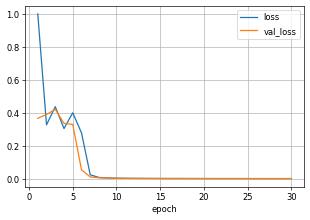

In [ ]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['loss','val_loss'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


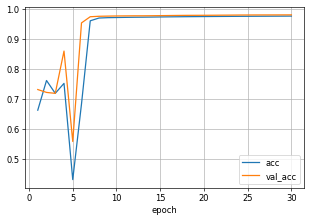

In [ ]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['acc','val_acc'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


#Comprobamos con alguno de los grid de las simulaciones, la detección de los **agentes mutantes**.

In [ ]:

from sklearn.metrics import confusion_matrix

torch.set_printoptions(precision=2)

X_prueba, y_prueba = next(iter(dataloader['val']))
y_prediccion = model(X_prueba)

y_prob = torch.argmax(softmax(y_prediccion), axis=1)
#y_prob[1]


In [ ]:

#y_prueba[1]


In [ ]:

y_prob[1].shape


torch.Size([40, 20, 20])

In [ ]:

y_prueba[1].shape


torch.Size([40, 20, 20])

In [ ]:
y_prob[1, 1]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0,

In [ ]:
y_prueba[1, 1]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0,

In [ ]:
y_prob.shape, y_prueba.shape

(torch.Size([10, 40, 20, 20]), torch.Size([10, 40, 20, 20]))

In [ ]:

# SALEN BIEN LOS CANALES: 2 canales por cada imagen que hemos metido --> lote de 10 videos (los cuales cada uno tiene 40 frames)
# -----------------------
y_prediccion.shape


torch.Size([10, 2, 40, 20, 20])

In [ ]:

# PODRÍAMOS CONSIDERAR 40 REPETICIONES DE LA PREDICCIÓN (como si fuera un ensamblado)
# y tomar el máximo como predicción GLOBAL
# -----------------------------------------------------------------------------------


#Elegimos un caso para evaluar el clasificador binario. Empleamos la matriz de confusión:

In [ ]:

confusion_matrix(y_prueba[1].flatten().numpy(), y_prob[1].flatten().numpy())


array([[12830,   650],
       [    0,  2520]])

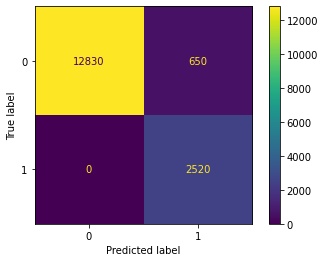

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

# Agente emocional         --> código: 0
# Agente mutante (traidor) --> código: 1
# --------------------------------------
ConfusionMatrixDisplay.from_predictions(y_prueba[1].flatten().numpy(), y_prob[1].flatten().numpy())


#Ahora probamos con todos los píxeles de los frames (de 10x10) del conjunto de **DATOS de ENTRENAMIENTO**.

<font color='red'>Parece que aprende a decir la clase más representada</font>

In [ ]:

from functools import reduce

predicciones_train  = []
observaciones_train = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['train']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones_train.append(list(y_prob.numpy().flatten()))
  observaciones_train.append(list(y_b.numpy().flatten()))

data_pred_train = reduce(lambda a, b: a+b, predicciones_train)
data_obs_train  = reduce(lambda a, b: a+b, observaciones_train)

confusion_matrix(data_obs_train, data_pred_train)


array([[1056951,   29649],
       [     40,  193360]])

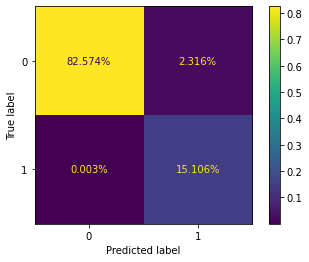

In [ ]:

ConfusionMatrixDisplay.from_predictions(data_obs_train, data_pred_train, normalize='all', values_format='.3%')


#Ahora probamos con todos los píxeles de los frames (de 10x10) del conjunto de **DATOS de VALIDACIÓN**.

In [ ]:

from functools import reduce

predicciones  = []
observaciones = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['val']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones.append(list(y_prob.numpy().flatten()))
  observaciones.append(list(y_b.numpy().flatten()))

data_pred = reduce(lambda a, b: a+b, predicciones)
data_obs  = reduce(lambda a, b: a+b, observaciones)

confusion_matrix(data_obs, data_pred)



array([[264282,   6158],
       [     0,  49560]])

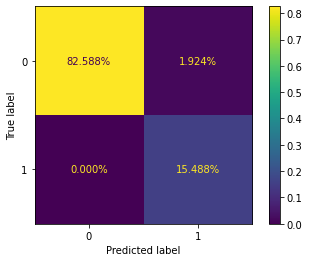

In [ ]:

ConfusionMatrixDisplay.from_predictions(data_obs, data_pred, normalize='all', values_format='.3%')


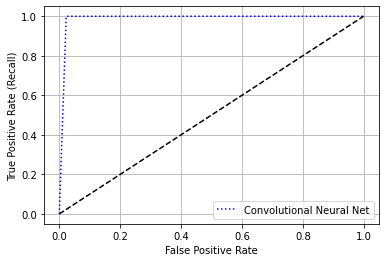

In [ ]:

from sklearn.metrics import roc_curve

# CURVA ROC  (Creo que son 'scores' lo que se le debe pasar
# como segundo argumento. No sé si se puede hacer así)
# ---------------------------------------------------------
fpr, tpr, thresholds = roc_curve(data_obs, data_pred)
plt.plot(fpr, tpr, 'b:', label='Convolutional Neural Net')
plt.plot([0, 1], [0, 1], 'k--')
#plt.axis([0, 1, 0, 1])     # Libro de Aurelien Geron
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


#<font color='red'>PRUEBAS</font> (Por si tengo que construir un ensamblado con la respuesta más frecuente entre las 40 matrices - una por cada frame -, aunque como la respuesta misma se repite por todo el lote no debería hacer falta)

In [ ]:

# Consulta: How does one use 3D convolutions on standard 3 channel images?
# https://stackoverflow.com/questions/57484508/how-does-one-use-3d-convolutions-on-standard-3-channel-images
# EJEMPLO:
# --------

torch.set_printoptions(precision=2)

torch.random.manual_seed(0)
N,C,D,H,W = 1,3,1,7,7
img = torch.randn(N,C,D,H,W)

# PARÁMETROS
# ----------
in_channels = C
out_channels = 2
kernel_size = 3
# -------------------

padding = kernel_size // 2

# RED
# ---
conv = torch.nn.Conv3d(in_channels, out_channels, kernel_size, padding=padding)
#conv = torch.nn.Sequential(
#    torch.nn.Conv3d(in_channels, out_channels, kernel_size, padding=1),
#    torch.nn.ReLU(),
#    torch.nn.Conv3d(n_filtros, 2, kernel_size, padding=1)
#)


# SALIDA:
# -------
# Le pasamos un video (N=1), con 3 canales (C=3), y una profundidad de 1 frames (D=1): N,C,D,H,W = 1,3,1,7,7
# Las dimensiones de la imagen son de: 7x7

out = conv(img)

print(out)
print(out.size())



tensor([[[[[ 0.40, -0.45,  0.33, -0.21,  0.28,  0.35, -0.22],
           [-0.07, -0.21, -0.18, -0.02,  0.00,  0.59, -0.22],
           [ 0.01, -0.10,  0.19, -0.32, -0.19, -0.11,  0.20],
           [ 0.24,  0.63,  0.60,  0.41, -0.25,  0.61,  0.36],
           [ 0.01, -0.39, -0.03,  0.10,  0.29, -0.13,  0.31],
           [-0.29,  0.02,  0.16,  0.03,  0.57,  0.11,  0.06],
           [ 0.14,  0.31,  0.24,  0.32,  0.59, -0.11, -0.18]]],


         [[[ 0.35,  0.22,  0.26,  0.38,  0.13,  0.01, -0.07],
           [-0.30,  0.33,  0.46,  0.33,  0.26, -0.37,  0.03],
           [ 0.08,  0.27,  0.13,  0.21,  0.30,  0.27, -0.29],
           [ 0.25, -0.45, -0.20, -0.50, -0.02, -0.03, -0.26],
           [ 0.27, -0.08, -0.21,  0.03,  0.25,  0.69, -0.27],
           [-0.15,  0.15,  0.03, -0.15,  0.33,  0.32,  0.27],
           [-0.07, -0.07, -0.32,  0.10, -0.37,  0.06,  0.41]]]]],
       grad_fn=<ConvolutionBackward0>)
torch.Size([1, 2, 1, 7, 7])


In [ ]:

import numpy as np
np.set_printoptions(precision=2)

# size = 7x7
v = np.zeros((7,7))


for i in range(7):
  for j in range(7):
    v[i,j] = max(out[0,:,0,i,j])

#matriz_numpy = out.squeeze(0).detach().numpy()
#matriz_numpy
#np.max(out.detach().numpy())

v


array([[ 0.4 ,  0.22,  0.33,  0.38,  0.28,  0.35, -0.07],
       [-0.07,  0.33,  0.46,  0.33,  0.26,  0.59,  0.03],
       [ 0.08,  0.27,  0.19,  0.21,  0.3 ,  0.27,  0.2 ],
       [ 0.25,  0.63,  0.6 ,  0.41, -0.02,  0.61,  0.36],
       [ 0.27, -0.08, -0.03,  0.1 ,  0.29,  0.69,  0.31],
       [-0.15,  0.15,  0.16,  0.03,  0.57,  0.32,  0.27],
       [ 0.14,  0.31,  0.24,  0.32,  0.59,  0.06,  0.41]])

#Puede que haya diseñado la red de manera no óptima. Releyendo el libro de PYTORCH, creo que para aprovechar realmente la información y detectar patrones en la secuencia de imágenes, creo que he de dar profundidad en el kernel.

En las pruebas utilizaba un tamaño de kernel = 3. Esto se traduce en la práctica, ya que también maneja profundidad, en un kernel: (3,3,3).

Teniendo en cuenta que manejamos un grid, el frame para capturar la actividad de los vecinos tendría que ser cuadricular 3x3. Pero creo que tenemos que darle profundidad, en la medida de lo posible que capture todo el pack de frames. Sería un kernel irregular con volumen.

Tipo: (40,3,3)

(*Podría utilizar OPTUNA para ver si se puede optimizar hasta el valor óptimo*).

In [1]:

import pandas as pd

# CARGAMOS LA BASE DE DATOS SIN PERMUTAR LAS FILAS (grid de 20x20, y población 85-15 emocionales/mutantes)
# ------------------------------------------------
bd_simulaciones = pd.read_csv('bd_100simulaciones_20x20_emo85_vs_15.csv')


#Variables explicativas: **X**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

size       = 20  # <------------------------------------------------------------------- LA POBLACIÓN 2 ES DE UN GRID DE 20x20
num_frames = 40
df         = bd_simulaciones.copy()

lista_RGBs         = []
lista_simulaciones = []

X            = []

nombre_columnas_ROJO  = ['r' + str(indice) for indice in range(size*size)]
nombre_columnas_VERDE = ['g' + str(indice) for indice in range(size*size)]
nombre_columnas_AZUL  = ['b' + str(indice) for indice in range(size*size)]

# Iteramos por las 8000 filas de la base de datos de prueba
for fila in range(len(bd_simulaciones)):
  canal_r = pd.array(df[nombre_columnas_ROJO].iloc[fila]).reshape(size,size)
  canal_v = pd.array(df[nombre_columnas_VERDE].iloc[fila]).reshape(size,size)
  canal_a = pd.array(df[nombre_columnas_AZUL].iloc[fila]).reshape(size,size)

  # CUIDADO que np.dstack apila los tres valores de cada pixel
  # ----------------------------------------------------------
  frame = np.array([canal_r, canal_v, canal_a])

  lista_RGBs.append(frame)

  if ((fila+1) % num_frames == 0):
    lista_simulaciones.append(np.array(lista_RGBs))
    lista_RGBs = []


X = np.array(lista_simulaciones)
X.shape


(100, 40, 3, 20, 20)

#Target: **Y**.

In [3]:
lista_targets            = []
lista_targets_simulacion = []

for fila in range(len(bd_simulaciones)):
  lista_id_agentes = bd_simulaciones.iloc[fila]['Target'].replace('[','').replace(']','')
  target = [int(caracter) for caracter in lista_id_agentes.split(',')]
  target = np.array(target)
  target = target.reshape(size,size)

  # Con los paréntesis  '['  ']' sale de dimensión: (8000, 1, 10, 10)   # <-------------------------- Aquí ajusto la DIMENSIÓN
  #lista_targets.append([target])
  # Si queremos de dimensión: (8000, 10, 10)
  lista_targets_simulacion.append(target)

  if ((fila+1) % num_frames == 0):
    lista_targets.append(np.array(lista_targets_simulacion))
    lista_targets_simulacion = []

Y = np.array(lista_targets)
Y.shape


(100, 40, 20, 20)

#**CONVERSIÓN EN TENSORES DE PyTorch**.

In [4]:
import numpy as np
import torch

# PRIMERO TENEMOS QUE EXTRAER LA MATRIX:  X
# y los valores del TARGET:               Y
#
# Luego pasaremos (X, Y) al Dataset que creamos a continuación.
# --------------------------------------------------------------

X_train = X
Y_train = Y

# CREAMOS UNA CLASE PARA LOS DATOS
# ================================

class Dataset_frames(torch.utils.data.Dataset):
  def __init__(self, X, Y):
    # self.X = torch.tensor(X).float()
    self.X = torch.tensor(X).permute(0,2,1,3,4).float()
    self.Y = torch.tensor(Y).long()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return self.X[ix], self.Y[ix]


# SELECCIONANDO GRUPOS DE OBSERVACIONES PARA VALIDACIÓN
# -----------------------------------------------------

from sklearn.model_selection import train_test_split

X_subset, X_val, Y_subset, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)

dataset = {
    'train' : Dataset_frames(X_subset, Y_subset),
    'val'   : Dataset_frames(X_val, Y_val)
}

# Al bajar el batch_size mejora mucho el entrenamiento. Debe ser que si pongo muchos, queda muy poca muestra
# Con 30 sale muy malo. Con 10 mejora mucho

dataloader = {
    'train' : torch.utils.data.DataLoader(dataset['train'], batch_size=10,   shuffle=False),
    'val'   : torch.utils.data.DataLoader(dataset['val'],   batch_size=10, shuffle=False)
}


#**<font color='red'>v2</font>: DEFINICIÓN DE LA RED Y MÉTODO PARA EL ENTRENAMIENTO**.

In [5]:

from sklearn.metrics import accuracy_score

# Fijamos el número de canales, filtros y profundidad de la imagen (número de frames de la animación)
# ----------------------------------------------------------------
n_in        = 3 # 40
n_filtros   = 40                                                                                                                       # 25 Mayo 2023
kernel_size = (40,3,3)   # <---------------------------------------------------------------------------------------------------------- #  CAMBIO 3 por tupla (_,3,3)
deepth      = 40  # Tomamos 40 frames de animación (parece que itera automáticamente por los índices profundidad y altura y anchura)

# CONSTRUIMOS EL MODELO
# =====================

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

# ---------------------------------------------------------------------
# Probamos inicialmente con un grid (10x10)
# ---------------------------------------------------------------------

def build_model(c=3, n_filtros=n_filtros, kernel_size=3):        # <-------------------------------------------------------- MODIFICAR (Definir la RED CONVOLUCIONAL)
  padding = kernel_size // 2
  model = torch.nn.Sequential(
      torch.nn.Conv3d(n_in, n_filtros, kernel_size, padding=padding),
      torch.nn.ReLU(),
      torch.nn.Conv3d(n_filtros, 2, kernel_size, padding=1)
  )
  return model


# DEFINIMOS LA FUNCIÓN DE ENTRENAMIENTO
# =====================================

def fit(model, dataloader, epochs=10, log_each=1):
   criterion = torch.nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

   l, acc         = [], []
   val_l, val_acc = [], []

   for e in range(1, epochs+1):
      _l, _acc = [], []
      model.train()  # <------------------------------------------ MODO de ENTRENAMIENTO
      for x_b, y_b in dataloader['train']:
        y_pred = model(x_b)
        loss   = criterion(y_pred, y_b)
        _l.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_probas = torch.argmax(softmax(y_pred), axis=1)
        # Los SCORES de SKLEARN no aceptan matrices, así que hay que convertirlas en dimensión 1D (usar flatten())
        _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.detach().numpy().flatten()))

      l.append(np.mean(_l))
      acc.append(np.mean(_acc))
      if not e % log_each:
        print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f}")
        #print(f"Epoch {e}/{epochs} loss {l[-1]:.5f}")


      model.eval()  # <------------------------------------------- MODO de EVALUACIÓN
      _l, _acc = [], []
      with torch.no_grad():
        for x_b, y_b in dataloader['val']:
          y_pred = model(x_b)
          loss   = criterion(y_pred, y_b)
          _l.append(loss.item())
          y_probas = torch.argmax(softmax(y_pred), axis=1)
          _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.numpy().flatten()))
      val_l.append(np.mean(_l))
      val_acc.append(np.mean(_acc))

   return {'epoch':list(range(1,epochs+1)), 'loss':l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}
   #return {'epoch':list(range(1,epochs+1)), 'loss':l, 'val_loss': val_l}




In [6]:

# INSTANCIAMOS EL MODELO
# ======================

# Imprimimos junto al número de Epoch, el valor de la función de pérdida y la accuracy (Roza el 90%)
model  = build_model()
hist   = fit(model, dataloader, 30)



Epoch 1/30 loss 0.95450 acc 0.71887
Epoch 2/30 loss 2.77347 acc 0.71362
Epoch 3/30 loss 0.35667 acc 0.74589
Epoch 4/30 loss 0.42524 acc 0.42629
Epoch 5/30 loss 0.28194 acc 0.68534
Epoch 6/30 loss 0.08088 acc 0.90882
Epoch 7/30 loss 0.01436 acc 0.97535
Epoch 8/30 loss 0.00613 acc 0.97788
Epoch 9/30 loss 0.00418 acc 0.97858
Epoch 10/30 loss 0.00330 acc 0.97902
Epoch 11/30 loss 0.00281 acc 0.97929
Epoch 12/30 loss 0.00248 acc 0.97953
Epoch 13/30 loss 0.00225 acc 0.97975
Epoch 14/30 loss 0.00208 acc 0.97987
Epoch 15/30 loss 0.00194 acc 0.97995
Epoch 16/30 loss 0.00183 acc 0.97998
Epoch 17/30 loss 0.00173 acc 0.97999
Epoch 18/30 loss 0.00165 acc 0.98002
Epoch 19/30 loss 0.00158 acc 0.98005
Epoch 20/30 loss 0.00152 acc 0.98010
Epoch 21/30 loss 0.00146 acc 0.98015
Epoch 22/30 loss 0.00141 acc 0.98022
Epoch 23/30 loss 0.00137 acc 0.98029
Epoch 24/30 loss 0.00132 acc 0.98036
Epoch 25/30 loss 0.00129 acc 0.98043
Epoch 26/30 loss 0.00125 acc 0.98048
Epoch 27/30 loss 0.00122 acc 0.98055
Epoch 28/3

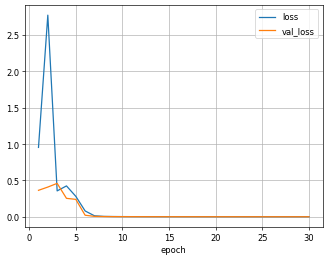

In [7]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['loss','val_loss'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


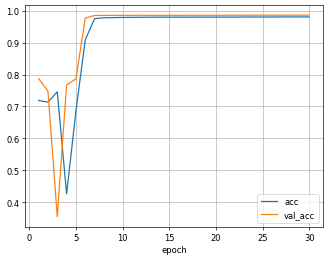

In [8]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['acc','val_acc'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()



In [10]:

from sklearn.metrics import confusion_matrix
torch.set_printoptions(precision=2)
from functools import reduce

predicciones  = []
observaciones = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['val']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones.append(list(y_prob.numpy().flatten()))
  observaciones.append(list(y_b.numpy().flatten()))

data_pred = reduce(lambda a, b: a+b, predicciones)
data_obs  = reduce(lambda a, b: a+b, observaciones)

confusion_matrix(data_obs, data_pred)


array([[267979,   4381],
       [    39,  47601]])

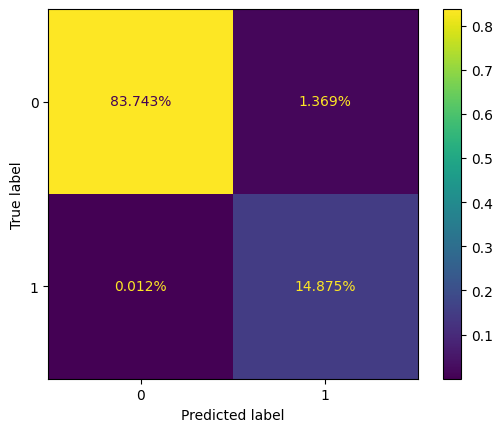

In [11]:

from sklearn.metrics import ConfusionMatrixDisplay

# Agente emocional         --> código: 0
# Agente mutante (traidor) --> código: 1
# --------------------------------------

ConfusionMatrixDisplay.from_predictions(data_obs, data_pred, normalize='all', values_format='.3%')


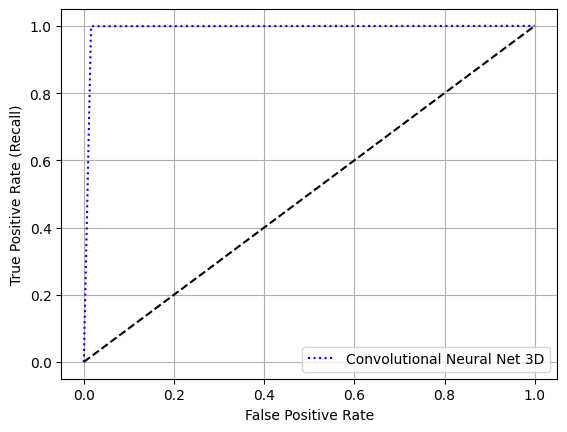

In [13]:

from sklearn.metrics import roc_curve

# CURVA ROC  (Creo que son 'scores' lo que se le debe pasar
# como segundo argumento. No sé si se puede hacer así)
# ---------------------------------------------------------
fpr, tpr, thresholds = roc_curve(data_obs, data_pred)
plt.plot(fpr, tpr, 'b:', label='Convolutional Neural Net 3D')
plt.plot([0, 1], [0, 1], 'k--')
#plt.axis([0, 1, 0, 1])     # Libro de Aurelien Geron
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()
